### **1. Introduction**

**1.1 Background**
<p style="color:blue;">MetroPT3 is an air compression system used in metro operations, which plays a crucial role in maintaining the functionality and efficiency of metro transit systems. Proper optimization of air compression operations is vital to ensure reliability, reduce maintenance costs, and enhance system performance. This project aims to analyze and optimize the air compression system by leveraging historical data and predictive analytics.</p>


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
data = pd.read_csv('/content/drive/MyDrive/metro dataset for predictive maintenance /MetroPT3(AirCompressor).csv')
print(display(data.head()))

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


None


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,305078.0,1.525385e+06,880685.770494,0.000,762692.5000,1525385.000,2288077.500,3050770.000
TP2,305077.0,8.979020e-01,2.768005,-0.030,-0.0140,-0.012,-0.010,10.652
TP3,305077.0,9.010502e+00,0.598318,0.886,8.5280,9.000,9.492,10.302
H1,305077.0,8.084943e+00,2.752614,-0.032,8.3600,8.860,9.386,10.272
DV_pressure,305077.0,-2.438781e-03,0.150471,-0.032,-0.0220,-0.020,-0.016,6.530
Reservoirs,305077.0,9.011459e+00,0.597634,0.866,8.5300,9.002,9.492,10.300
Oil_temperature,305077.0,5.873898e+01,5.889935,18.525,55.2250,57.700,60.950,78.200
Motor_current,305077.0,1.613240e+00,2.158070,0.020,0.0375,0.040,3.765,9.295
COMP,305077.0,9.000974e-01,0.299871,0.000,1.0000,1.000,1.000,1.000
DV_eletric,305077.0,1.001911e-01,0.300255,0.000,0.0000,0.000,0.000,1.000


In [6]:
data.rename(columns={'Unnamed: 0': 'Index', 'DV_eletric':'DV_electric'}, inplace=True)

In [7]:
data.columns

Index(['Index', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_electric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses'],
      dtype='object')

In [ ]:
#data.drop(columns=['timestamp'],inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305078 entries, 0 to 305077
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Index            305078 non-null  int64  
 1   timestamp        305078 non-null  object 
 2   TP2              305077 non-null  float64
 3   TP3              305077 non-null  float64
 4   H1               305077 non-null  float64
 5   DV_pressure      305077 non-null  float64
 6   Reservoirs       305077 non-null  float64
 7   Oil_temperature  305077 non-null  float64
 8   Motor_current    305077 non-null  float64
 9   COMP             305077 non-null  float64
 10  DV_electric      305077 non-null  float64
 11  Towers           305077 non-null  float64
 12  MPG              305077 non-null  float64
 13  LPS              305077 non-null  float64
 14  Pressure_switch  305077 non-null  float64
 15  Oil_level        305077 non-null  float64
 16  Caudal_impulses  305077 non-null  floa

In [9]:
# Try to convert to datetime, with errors set to 'coerce'
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

# Identify and remove rows where conversion failed (NaT)
invalid_rows = data[data['timestamp'].isna()]
print("Invalid rows found:", len(invalid_rows))

# Remove rows with invalid timestamps
data.dropna(subset=['timestamp'], inplace=True)


Invalid rows found: 1


### **2.1 Introduction to Sweetviz**

Exploratory Data Analysis (EDA) is a pivotal stage in understanding your dataset, revealing underlying trends, and uncovering insightful patterns. To streamline this process, we employ **<span style="color: #1f77b4;">Sweetviz</span>**, a powerful Python library designed to generate comprehensive and visually appealing EDA reports.

### **2.2 What is Sweetviz?**

**<span style="color: #ff7f0e;">Sweetviz</span>** is a robust library that simplifies EDA by offering:
- **Summary Statistics**: Quickly view key statistics and data distributions.
- **Visual Comparisons**: Compare datasets and observe variations.
- **Correlation Insights**: Discover relationships between features.
- **Missing Values Analysis**: Identify and address missing data.

#### **2.2.1 Key Features**

- **<span style="color: #2ca02c;">Visual Appeal</span>**: Sweetviz generates colorful and interactive reports that enhance data comprehension.
- **<span style="color: #d62728;">Efficiency</span>**: Provides a quick and detailed overview of your data without extensive coding.
- **<span style="color: #9467bd;">User-Friendly</span>**: Designed to be intuitive, even for those new to data analysis.


In [13]:
import pandas as pd
import sweetviz as sv

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/metro dataset for predictive maintenance /MetroPT3(AirCompressor).csv')

# Generate the Sweetviz report
report = sv.analyze(data)

# Show the report in a Jupyter notebook
report.show_html('sweetviz_report.html')

# If you want to open it in the browser manually
print("Sweetviz report generated and saved as 'sweetviz_report.html'")


                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Sweetviz report generated and saved as 'sweetviz_report.html'


**3. Time Series Visualization**

Visualizing the dataset's time series components is crucial for uncovering temporal patterns, trends, and anomalies. This section provides an in-depth look at how to leverage Matplotlib for a comprehensive time series analysis of the air compression data.

3.1 Overview

Time series visualization helps in understanding:

<span style="color: #1f77b4;">Trends</span>: Long-term movements in data.

<span style="color: #ff7f0e;">Seasonality</span>: Regular patterns or cycles in data.

<span style="color: #2ca02c;">Anomalies</span>: Unusual observations that deviate from the norm.

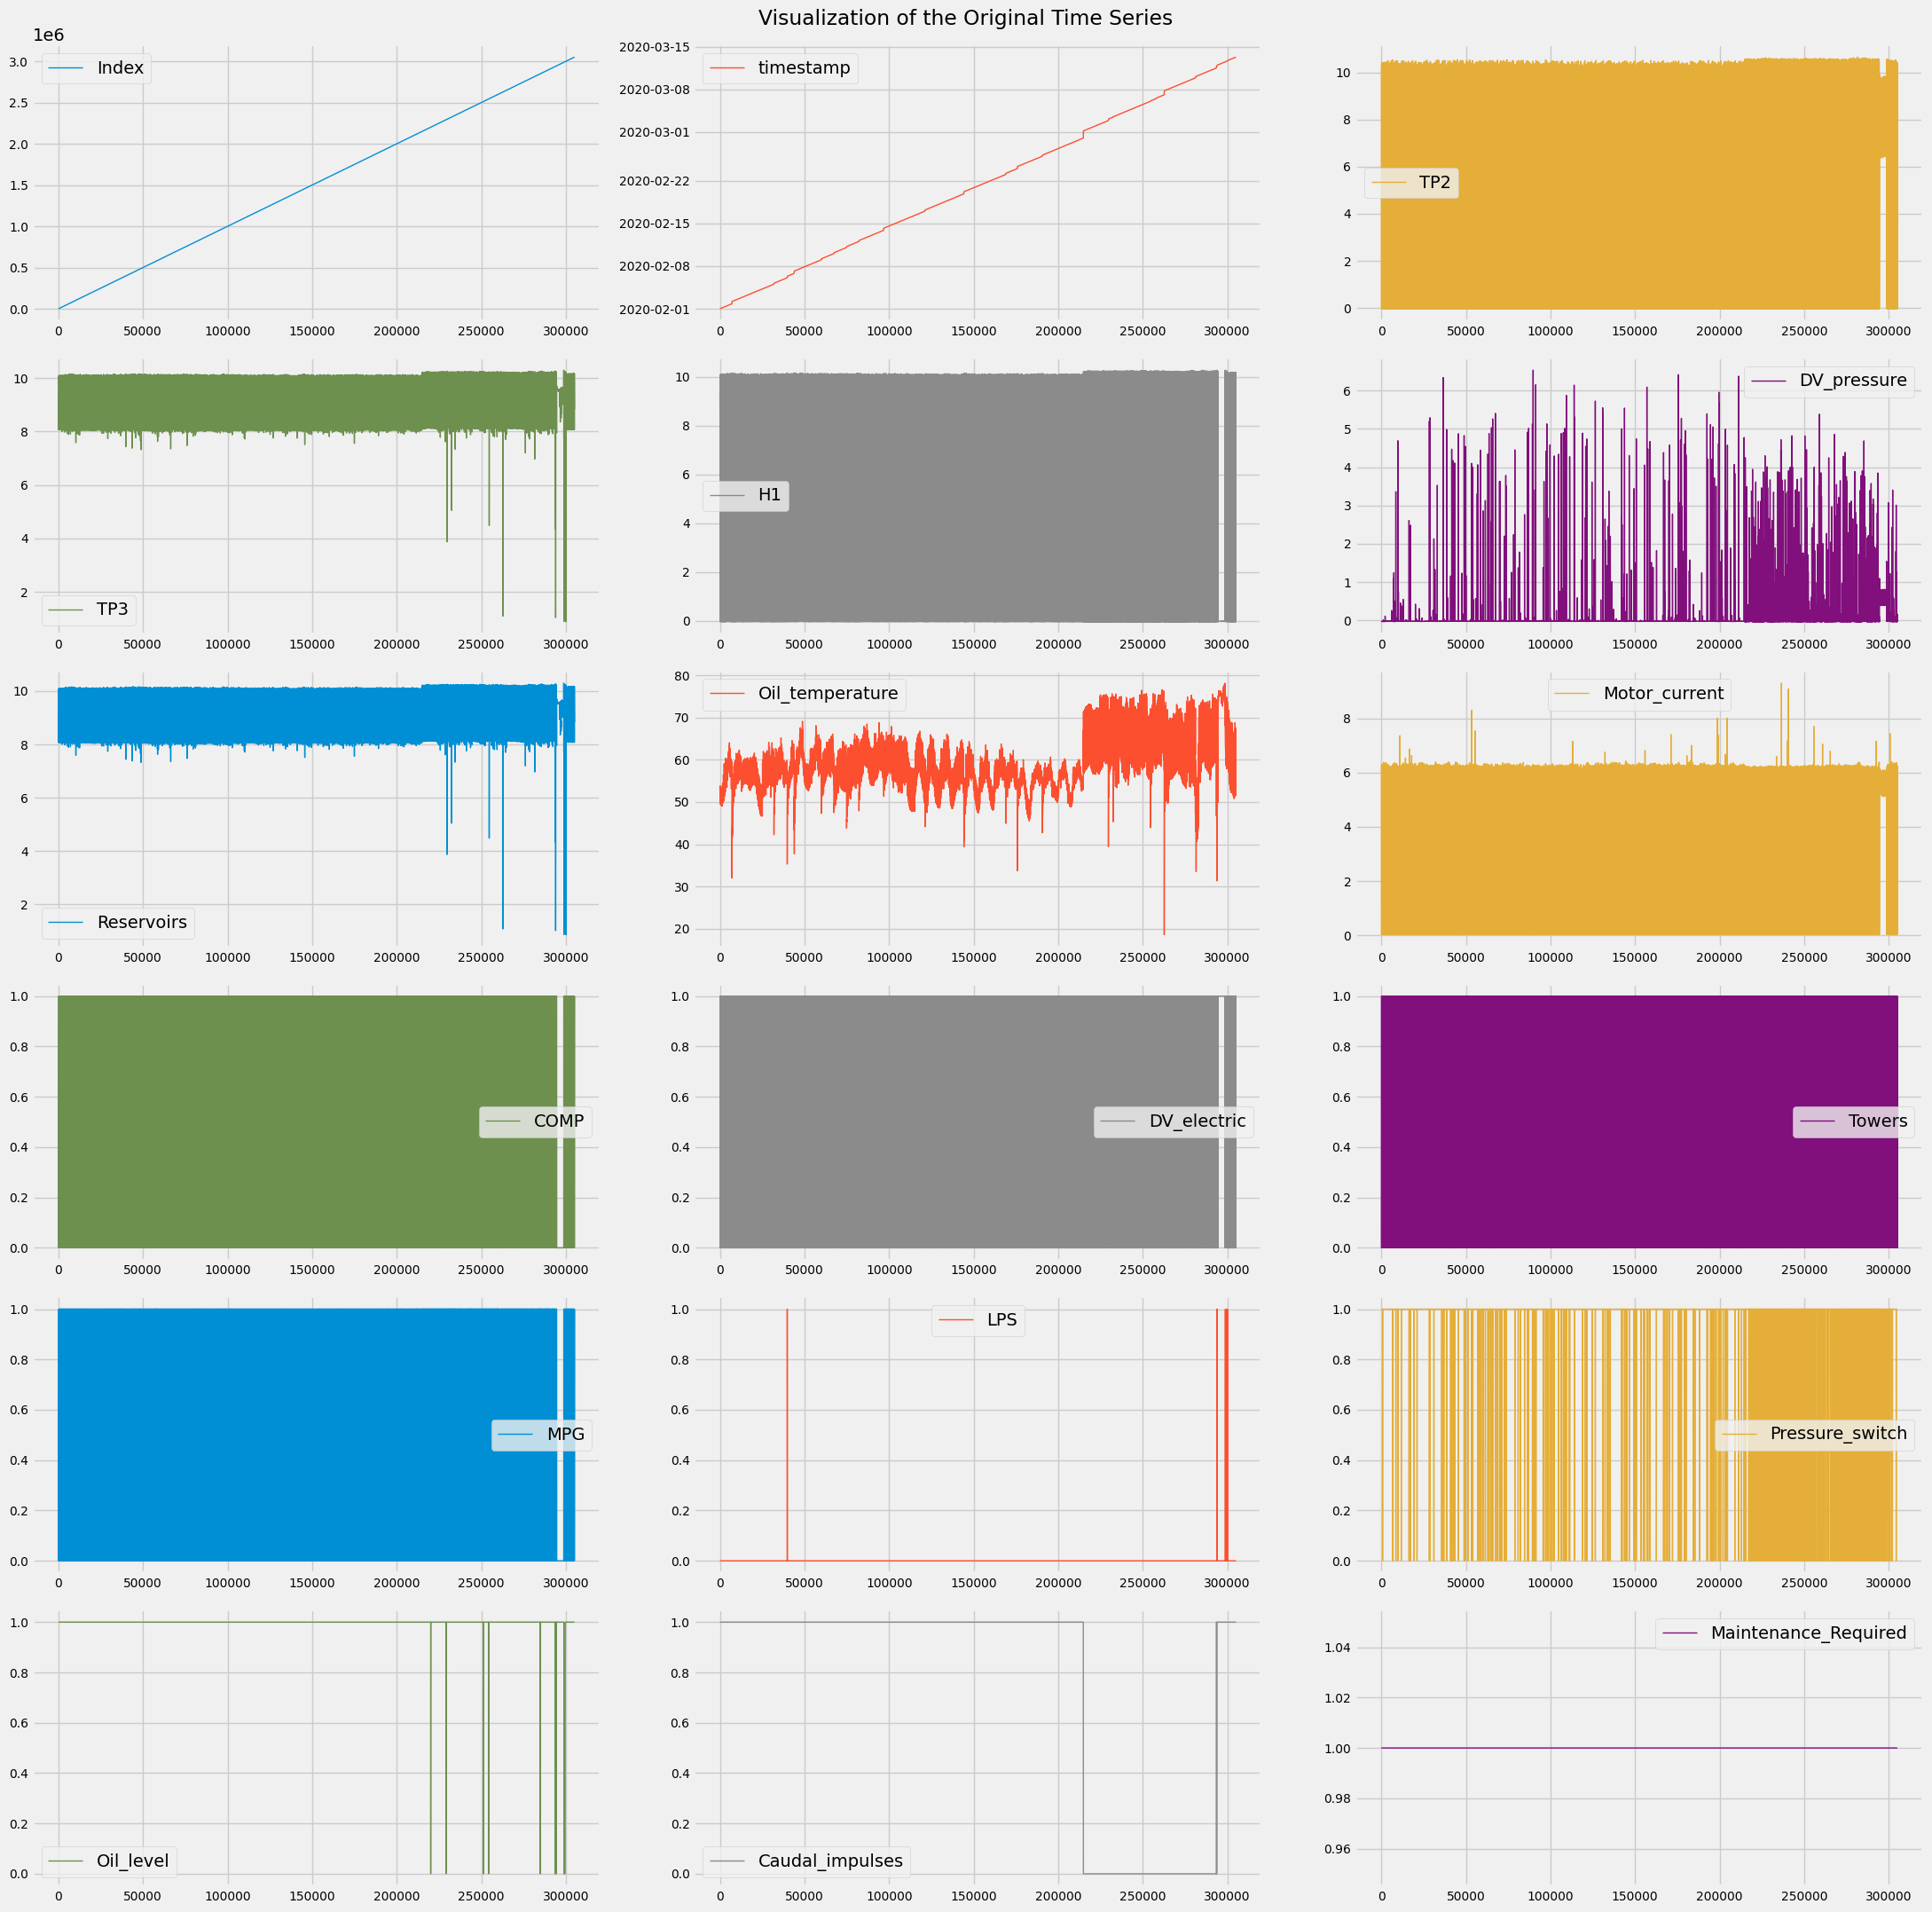

In [ ]:
plt.style.use('fivethirtyeight')
data.plot(subplots=True,
          layout=(6, 3),
          figsize=(22, 22),
          fontsize=10,
          linewidth=1,
          sharex=False,
          title='Visualization of the Original Time Series')

plt.tight_layout()
plt.show()

<Figure size 2200x2200 with 0 Axes>

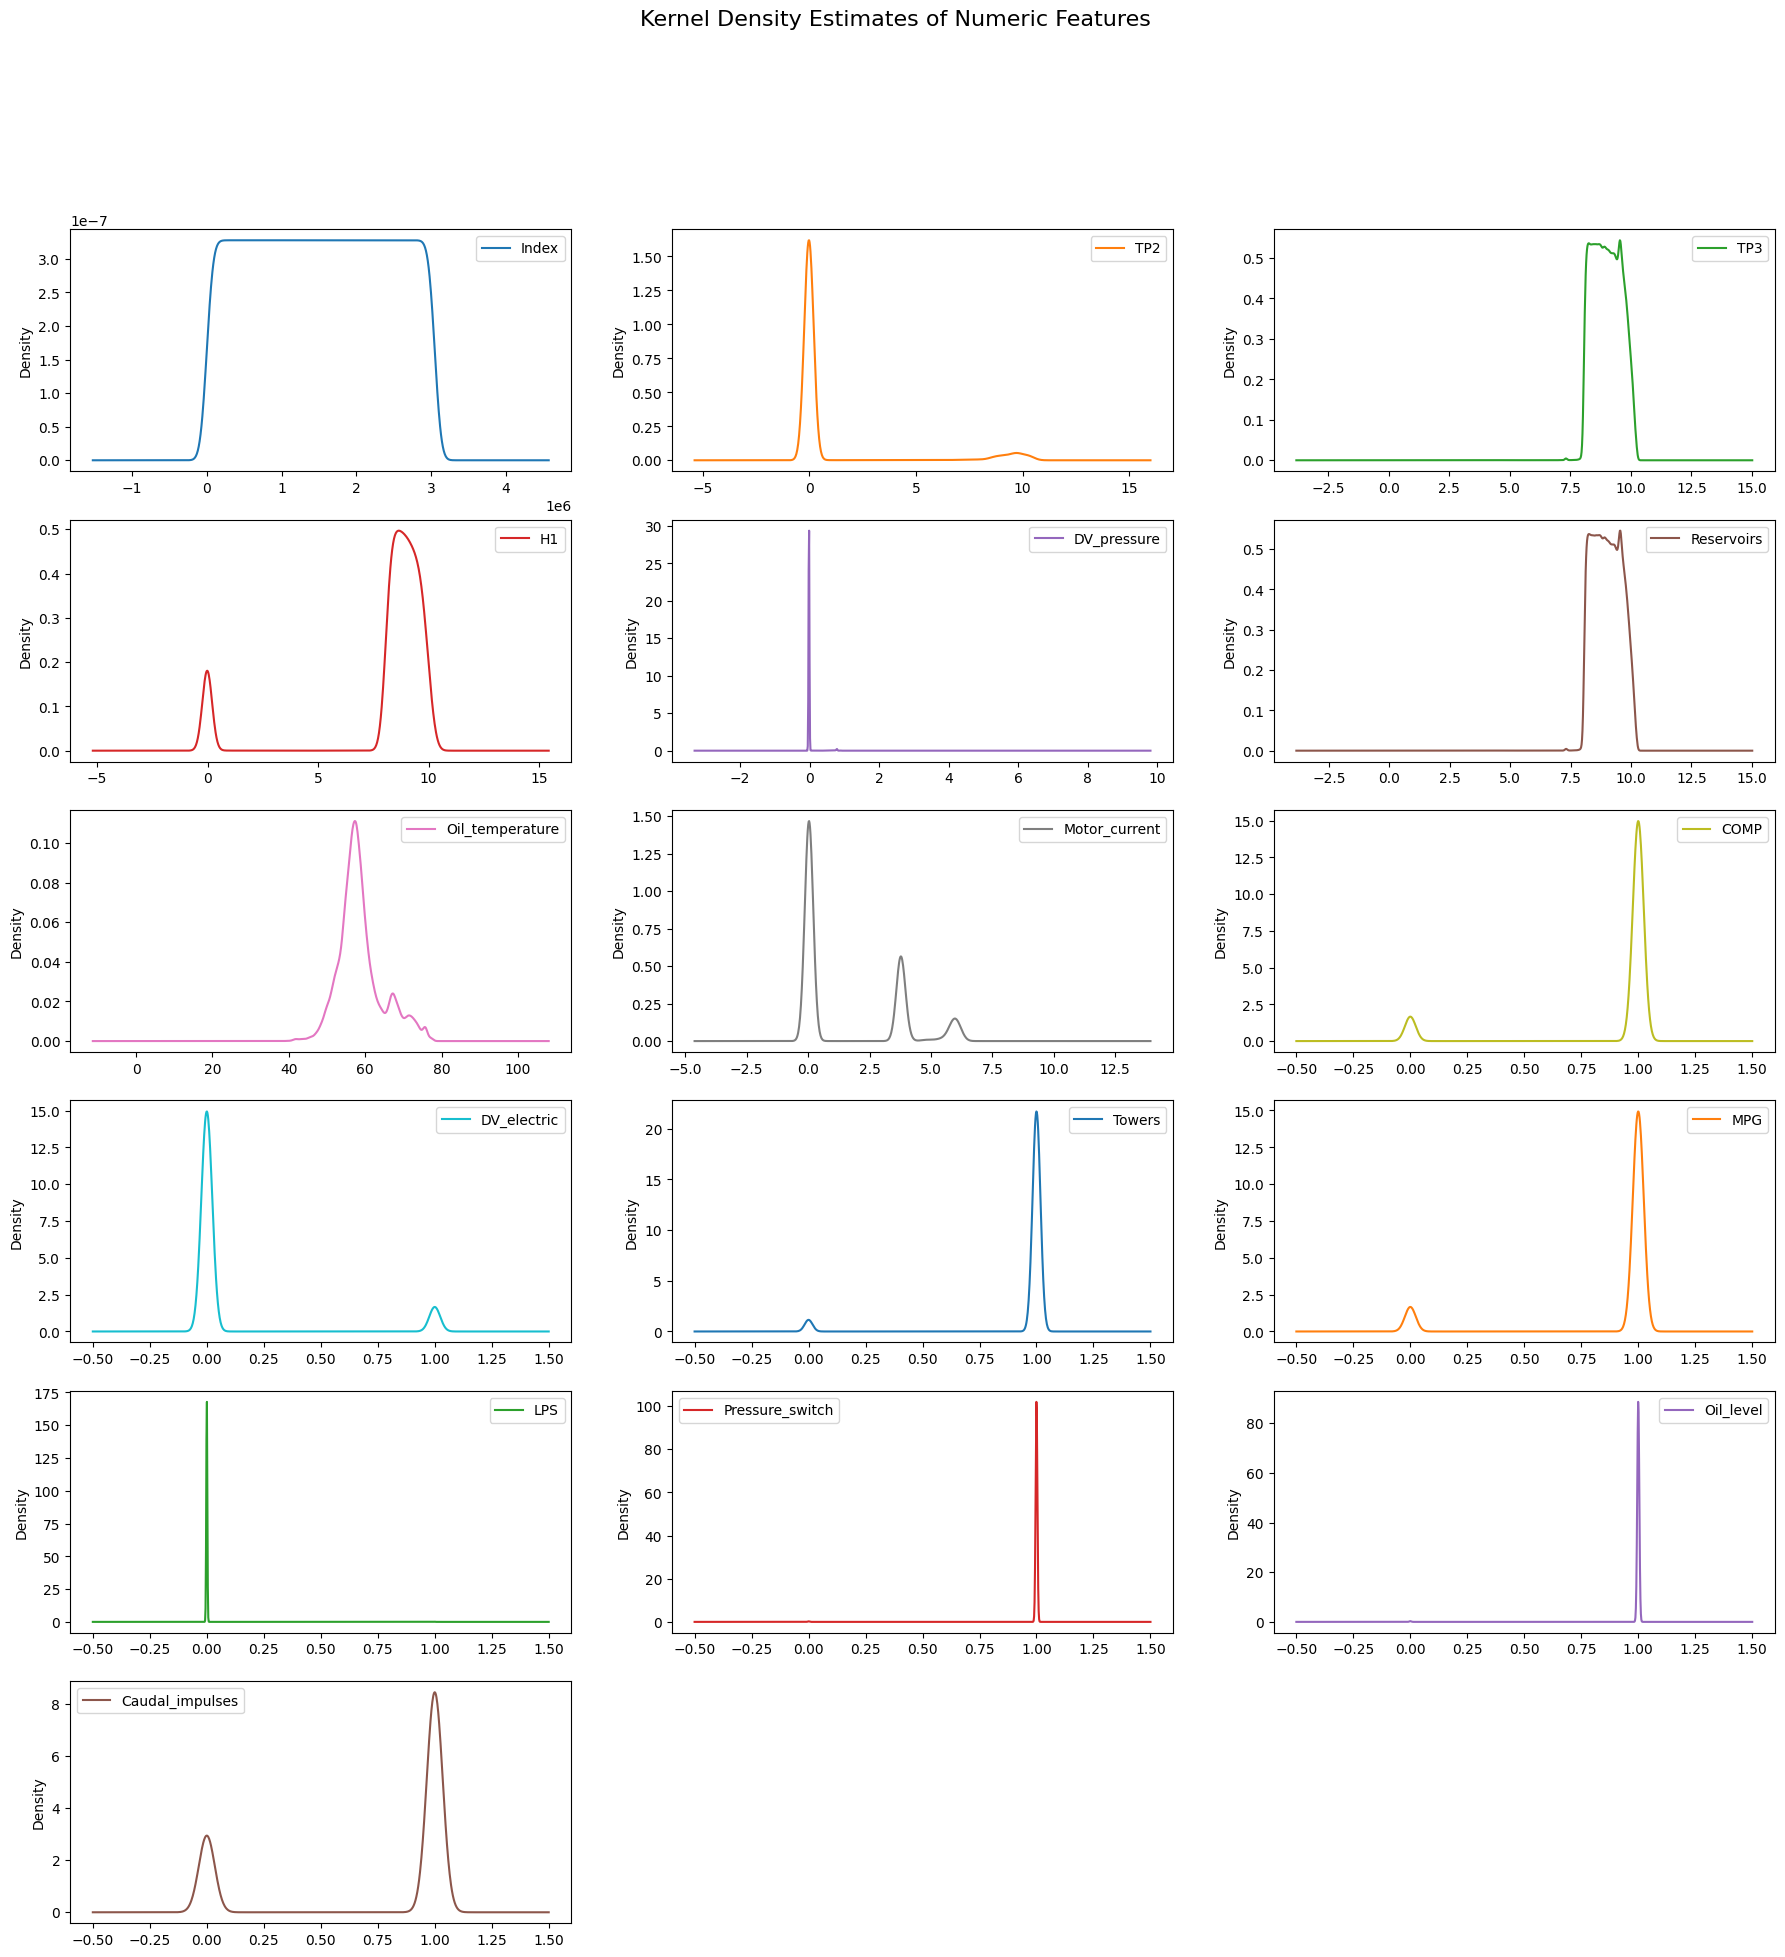

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure only numeric columns are included
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot KDE for numeric columns
plt.figure(figsize=(22, 22))
numeric_data.plot(kind='kde', subplots=True, layout=(6, 3), figsize=(22, 22), sharex=False)
plt.suptitle('Kernel Density Estimates of Numeric Features', fontsize=16)
plt.show()


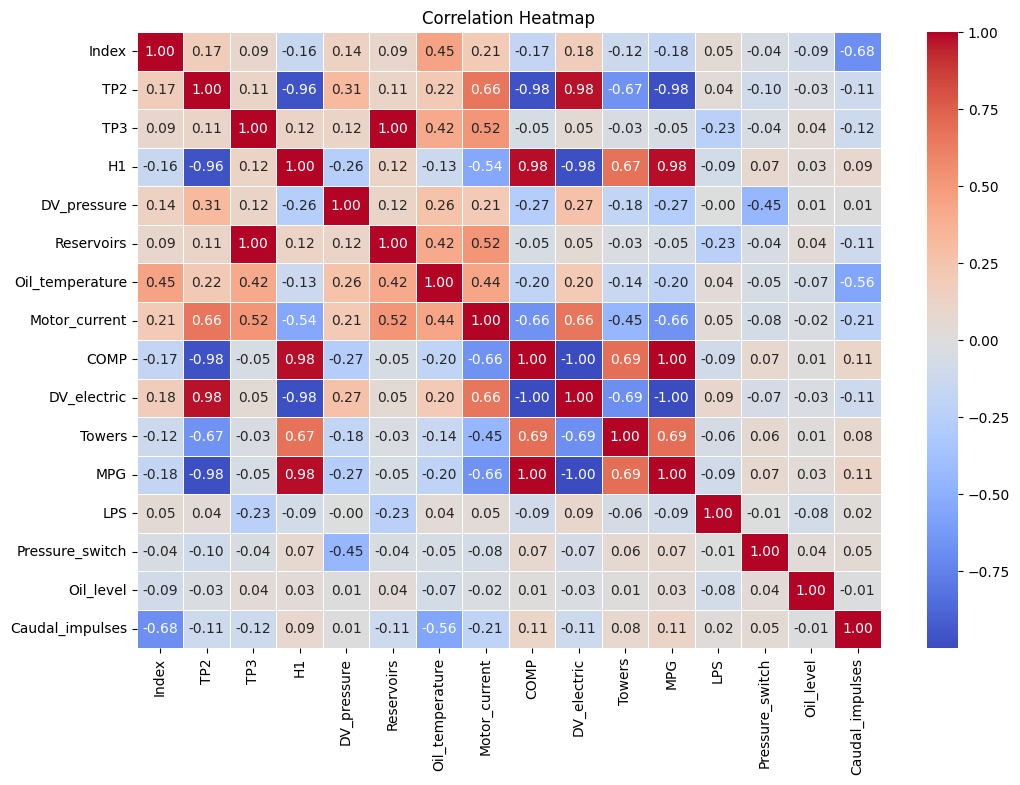

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = numeric_data.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
data.isnull().sum()

,0
Index,0
timestamp,0
TP2,0
TP3,0
H1,0
DV_pressure,0
Reservoirs,0
Oil_temperature,0
Motor_current,0
COMP,0


###**4. Data Cleaning**

Data cleaning is an essential step in preparing the dataset for analysis. It involves handling missing values, correcting errors, and ensuring consistency in the data. This process is crucial for ensuring the accuracy and reliability of any subsequent analysis.

4.1 Importance of Data Cleaning

Effective data cleaning ensures:

<span style="color: #1f77b4;">Accuracy</span>: Reduces errors and discrepancies in data.

<span style="color: #ff7f0e;">Consistency</span>: Ensures data uniformity across different columns and entries.

<span style="color: #2ca02c;">Reliability</span>: Improves the quality of data-driven insights and models.

In [10]:
data.fillna(method='ffill', inplace=True)

<ipython-input-10-519281724d28>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [11]:
data.isnull().sum()

,0
Index,0
timestamp,0
TP2,0
TP3,0
H1,0
DV_pressure,0
Reservoirs,0
Oil_temperature,0
Motor_current,0
COMP,0


**CHECKING FOR OUTLINERS USING ZSCORE AND PAIR PLOT**

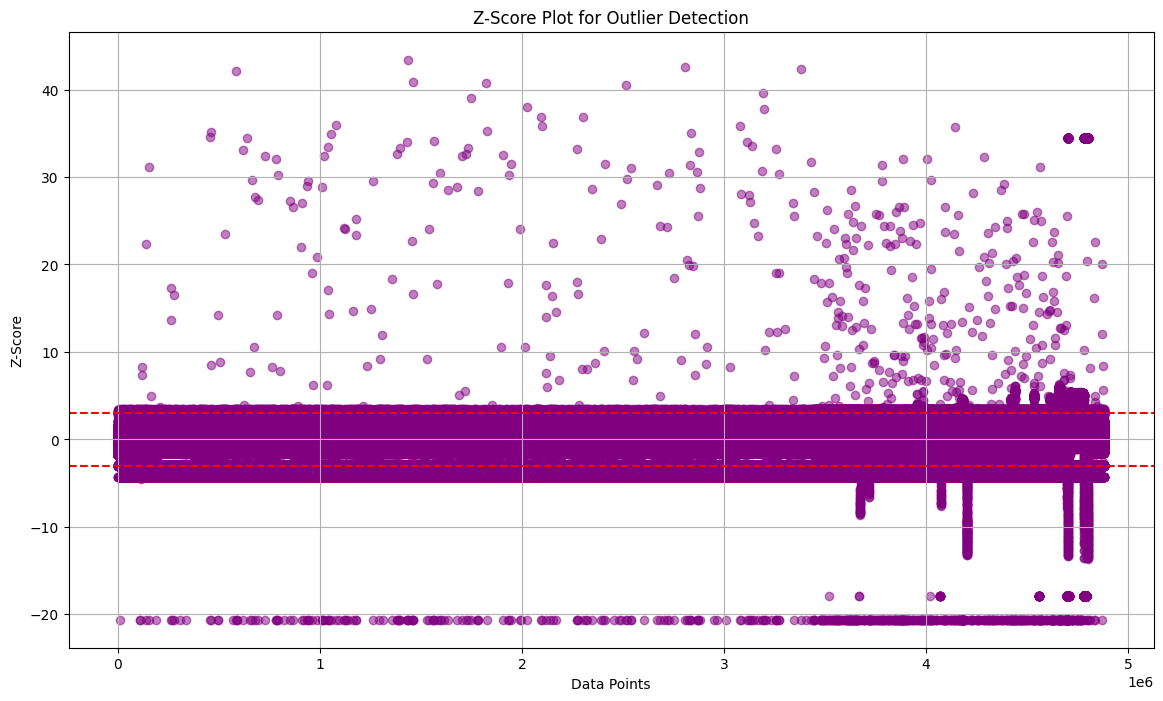

In [12]:
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Select only numerical columns from the dataset
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate Z-scores for the numerical columns
z_scores = numerical_data.apply(zscore).stack()

# Plot Z-scores to identify potential outliers
plt.figure(figsize=(14, 8))
plt.scatter(range(len(z_scores)), z_scores, alpha=0.5, color='purple')
plt.axhline(y=3, color='red', linestyle='--')
plt.axhline(y=-3, color='red', linestyle='--')
plt.title('Z-Score Plot for Outlier Detection')
plt.xlabel('Data Points')
plt.ylabel('Z-Score')
plt.grid(True)
plt.show()


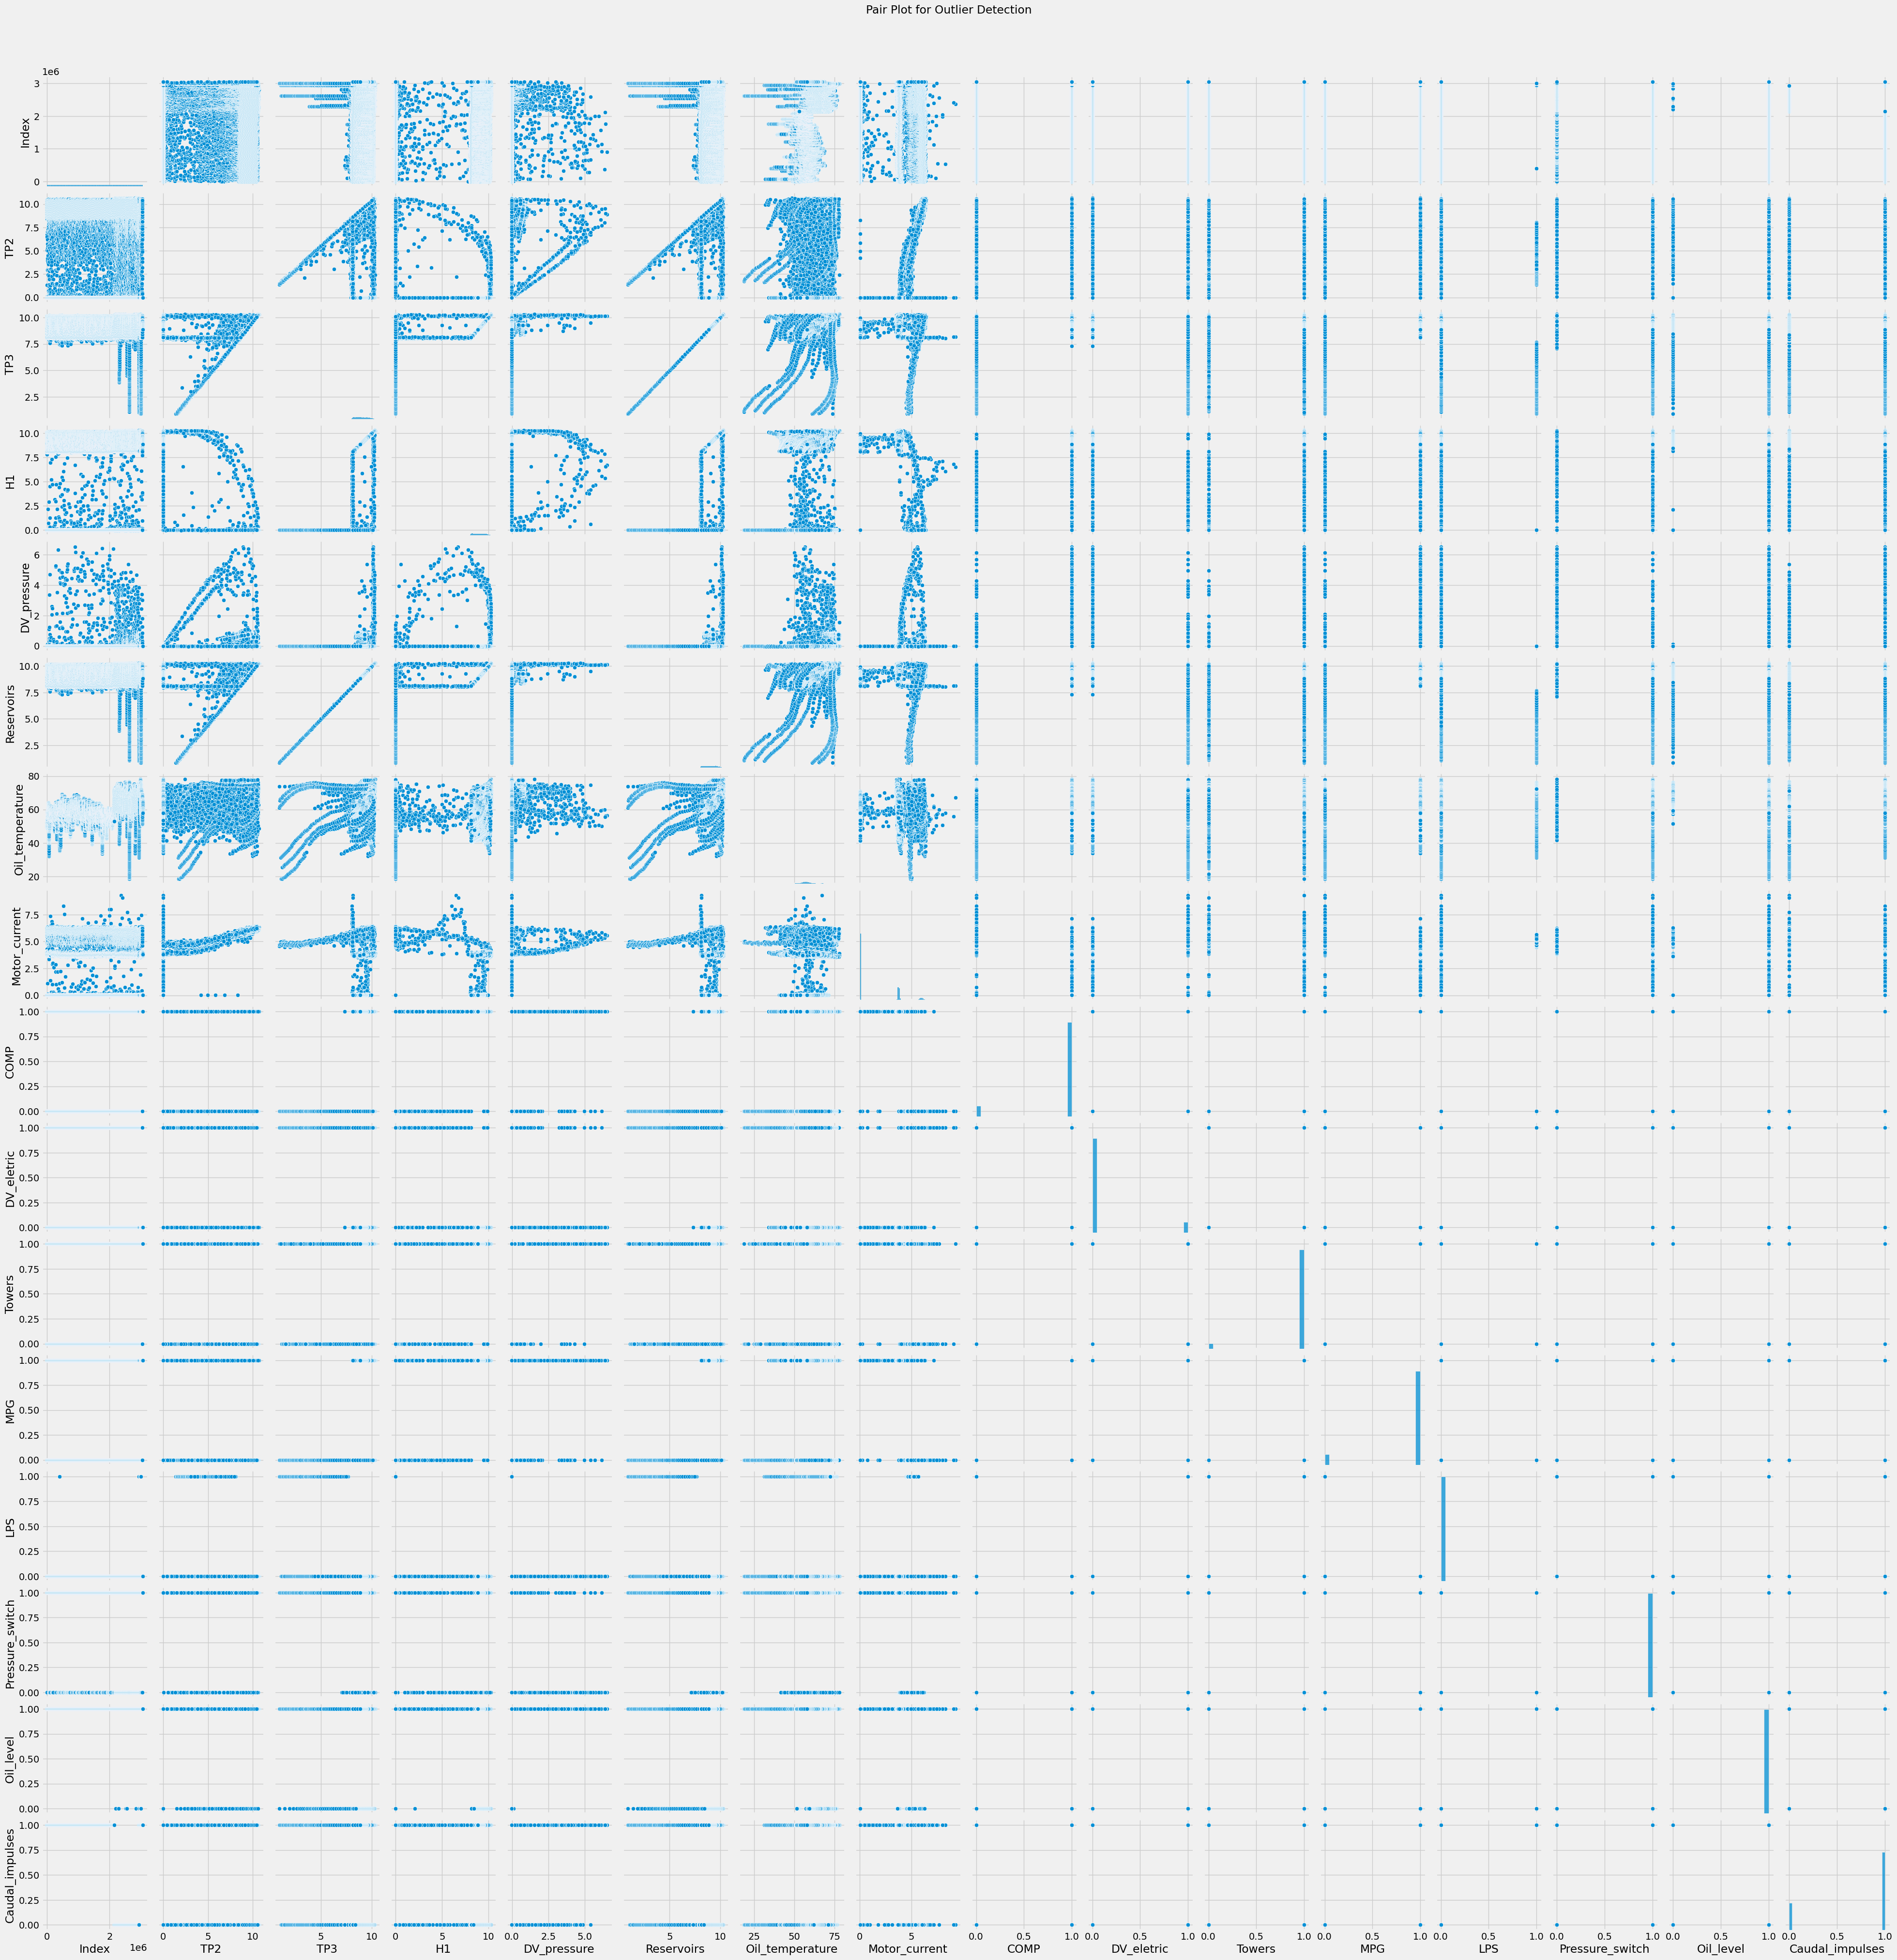

In [ ]:
import seaborn as sns

sns.pairplot(data)
plt.suptitle('Pair Plot for Outlier Detection', y=1.02)
plt.show()


###**5. Creating New Variables for Predictive Analysis**
Creating new variables involves generating additional features that may enhance the predictive power of our model. These features are derived from existing data to capture more complex patterns or relationships. This step can significantly impact the performance of predictive models.

5.1 Importance of Feature Engineering

Feature engineering helps to:

<span style="color: #1f77b4;">Enhance Model Performance</span>: By providing additional information that may improve model accuracy.

<span style="color: #ff7f0e;">Capture Complex Patterns</span>: Through derived features that better represent underlying relationships.

<span style="color: #2ca02c;">Simplify Model Complexity</span>: By reducing the need for complex models if useful features are engineered.

In [35]:
import pandas as pd

# Example: Creating a binary target variable
high_threshold = 45
medium_threshold = 30

# Example: Creating a categorical target variable
def categorize_maintenance_Oil_temperature(row):
    if row['Oil_temperature'] > high_threshold:
        return 'High'
    elif row['Oil_temperature'] > medium_threshold:
        return 'Medium'
    else:
        return 'Low'

data['Maintenance_Category'] = data.apply(categorize_maintenance_Oil_temperature, axis=1)

# Define features and target
features = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
             'Motor_current', 'COMP', 'DV_electric', 'Towers', 'MPG', 'LPS',
             'Pressure_switch', 'Oil_level', 'Caudal_impulses']
X = data[features]
y = data['Maintenance_Category']


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy to fill missing values
imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)

# Transform the test data
X_test = imputer.transform(X_test)

# Now you can proceed with prediction
y_pred = model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [26]:
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00     91080
         Low       0.94      1.00      0.97        15
      Medium       1.00      1.00      1.00       429

    accuracy                           1.00     91524
   macro avg       0.98      1.00      0.99     91524
weighted avg       1.00      1.00      1.00     91524

Confusion Matrix:
[[91080     0     0]
 [    0    15     0]
 [    0     1   428]]


The confusion matrix shows that the model has performed exceptionally well, with only a few misclassifications in the "Low" and "Medium" classes. The perfect accuracy for "High" and "Medium" classes, combined with minimal errors for "Low", indicates a robust classification performance.

**DRAFTING FEATURE IMPORTANCE**

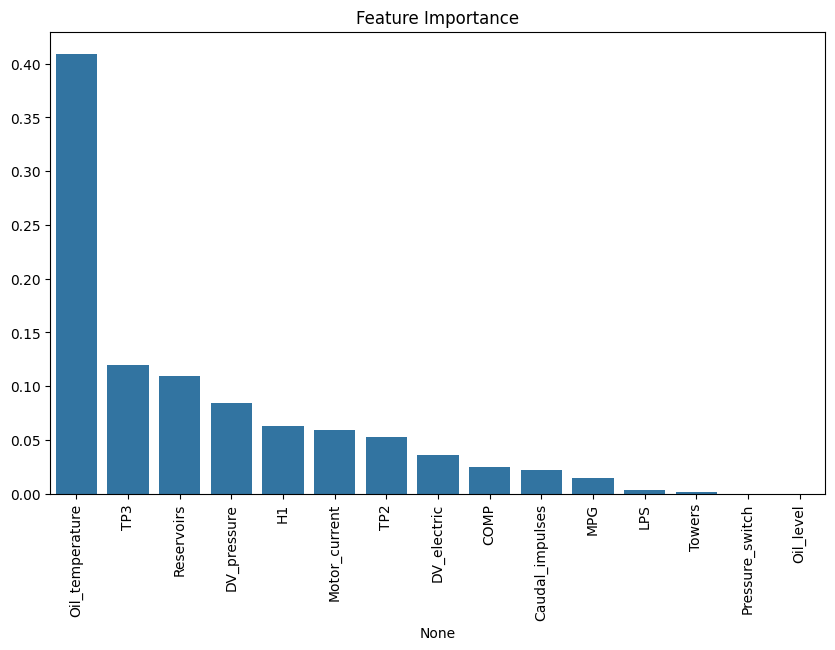

In [32]:
importances = model.feature_importances_
features_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=features_importance.index, y=features_importance.values)
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()


**NOW THE VARIABLE IS TP2**

In [47]:
import pandas as pd

# Define thresholds for TP2
high_threshold_tp2 = 6
medium_threshold_tp2 = 2.5

# Define the categorization function based on TP2
def categorize_maintenance_tp2(row):
    if row['TP2'] > high_threshold_tp2:
        return 'High'
    elif row['TP2'] > medium_threshold_tp2:
        return 'Medium'
    else:
        return 'Low'

# Apply the function to create the 'Maintenance_Category' column
data['Maintenance_Category'] = data.apply(categorize_maintenance_tp2, axis=1)

# Define features and target
features = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
             'Motor_current', 'COMP', 'DV_electric', 'Towers', 'MPG', 'LPS',
             'Pressure_switch', 'Oil_level', 'Caudal_impulses']
X = data[features]
y = data['Maintenance_Category']

# Now X and y are ready for model training and evaluation


In [49]:
X_train_tp2, X_test_tp2, y_train_tp2, y_test_tp2 = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
model_tp2 = RandomForestClassifier(random_state=42)
model_tp2.fit(X_train_tp2 ,y_train_tp2)

RandomForestClassifier(random_state=42)

In [51]:
y_pred_tp2 = model_tp2.predict(X_test_tp2)
print("Classification Report:")
print(classification_report(y_test_tp2, y_pred_tp2))
print("Confusion Matrix:")
print(confusion_matrix(y_test_tp2, y_pred_tp2))

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      8671
         Low       1.00      1.00      1.00     82483
      Medium       1.00      1.00      1.00       370

    accuracy                           1.00     91524
   macro avg       1.00      1.00      1.00     91524
weighted avg       1.00      1.00      1.00     91524

Confusion Matrix:
[[ 8671     0     0]
 [    0 82483     0]
 [    0     0   370]]


The confusion matrix confirms that there are no misclassifications. Every instance is accurately classified into its respective category, resulting in a perfect classification performance across all classes.

**DRAFTING FEATURE IMPORTANCE**

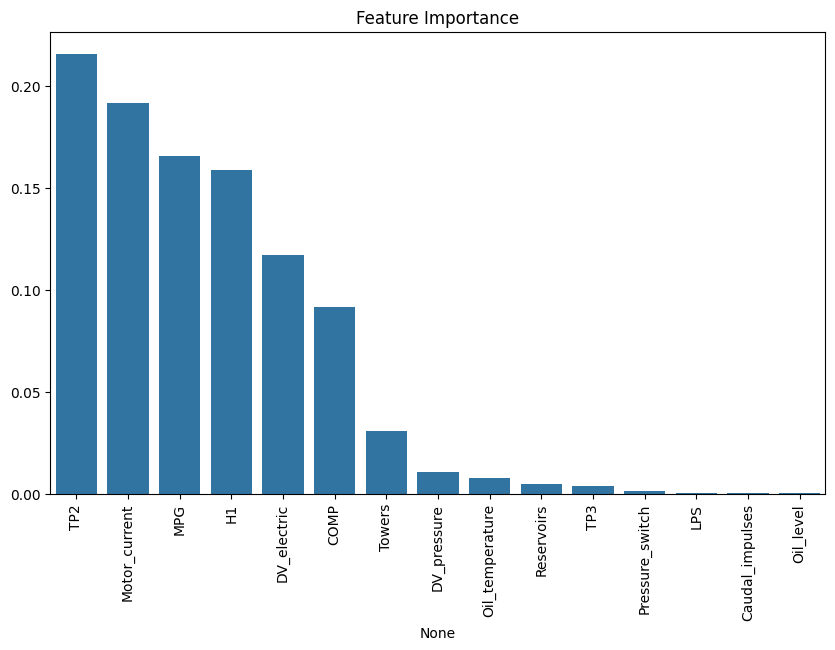

In [52]:
importances = model_tp2.feature_importances_
features_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=features_importance.index, y=features_importance.values)
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()
